Importing the libraries to workspace

In [4]:
!pip install nltk


     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 267.7/267.7 kB 971.5 kB/s eta 0:00:00
     -------------------------------------- 96.6/96.6 kB 690.8 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install PorterStemmer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for PorterStemmer
Failed to build PorterStemmer
  Running setup.py install for PorterStemmer: started
  Running setup.py install for PorterStemmer: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [5 lines of output]
  running bdist_wheel
  running build
  running build_ext
  building 'porterstemmer' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PorterStemmer
  error: subprocess-exited-with-error
  
  Running setup.py install for PorterStemmer did not run successfully.
  exit code: 1
  
  [5 lines of output]
  running install
  running build
  running build_ext
  building 'porterstemmer' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates

In [34]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 830.3 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sbs
import re   #used as regular expression to find the paticular patterns in the dataset and processing it
import string  #used to obtain information from string and manipulate it
import nltk #natural language tool kit-work on text data and processing it
import warnings #to manipulate warnings
warnings.filterwarnings('ignore')  #ignore the warnings which occurs while working 

Importing the dataset

In [2]:
df=pd.read_csv("Twitter Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.shape

(31962, 3)

Preprocessing the dataset

In [5]:
#removing pattern in the input data
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for word in r:
        input_text=re.sub(word,"",input_text)
    return input_text

In [6]:
#remove twitter handles/useernames
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
#remove special characters
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-z#]"," ")

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can t use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [ser, when, a, father, is, dysfunctional, and,...
1    [ser, ser, thanks, for, #lyft, credit, i, can,...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

In [11]:
#stem the word
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

In [12]:
#stem the words
tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [ser, when, a, father, is, dysfunct, and, is, ...
1    [ser, ser, thank, for, #lyft, credit, i, can, ...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: clean_tweet, dtype: object

In [13]:
#combining the words in tokenized tweet into single senetence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunct and is so selfis...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thank for #lyft credit i can t use cau...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


In [14]:
#viszualize the frequently used words

all_words=" ".join([sentence for sentence in df['clean_tweet']])

In [15]:
from wordcloud import WordCloud

In [16]:
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

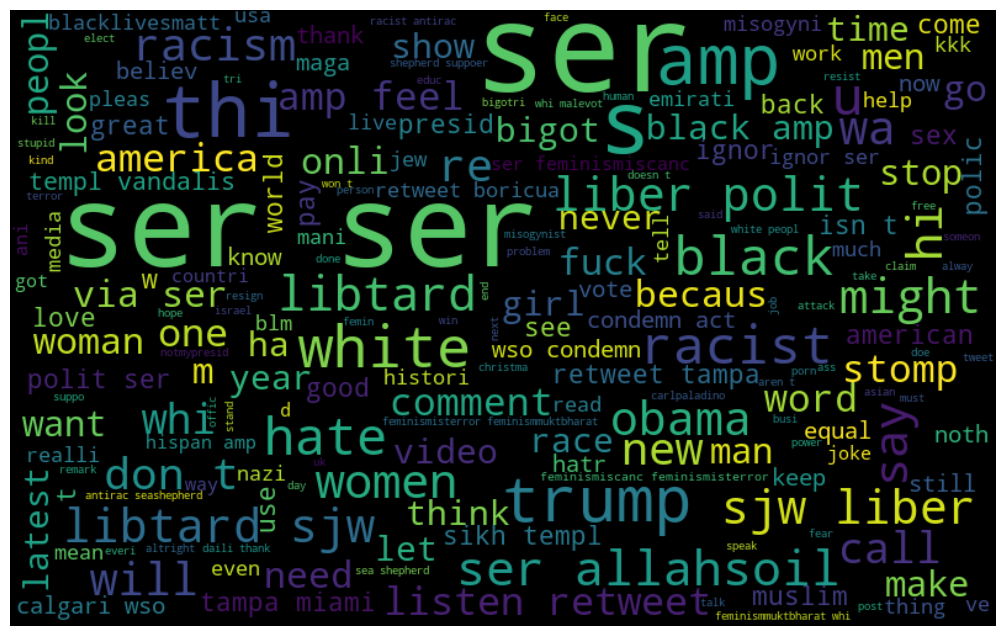

In [23]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

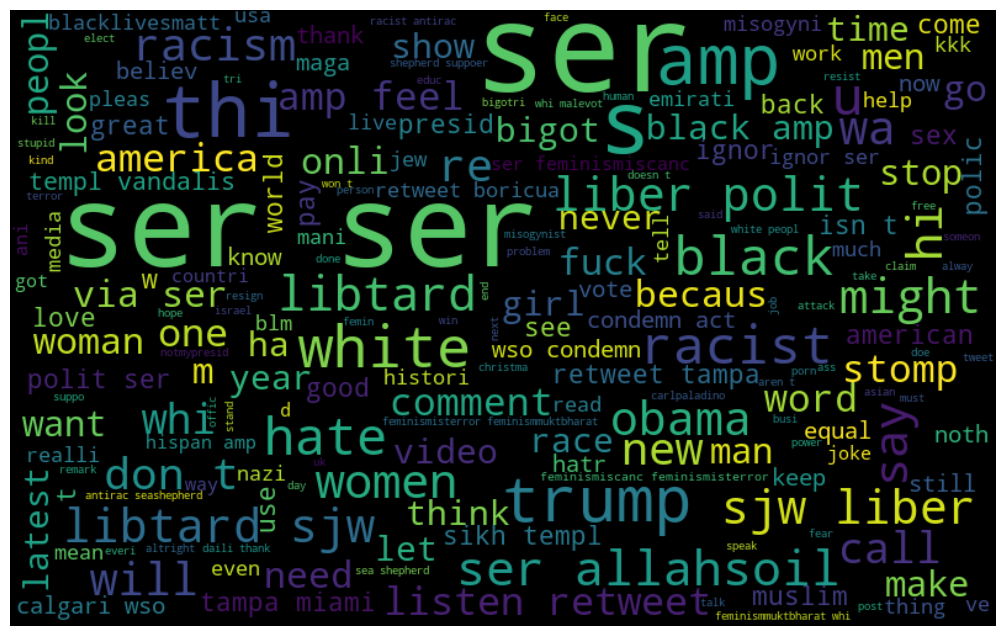

In [24]:
#frequency of negative words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud 
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#ploting the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

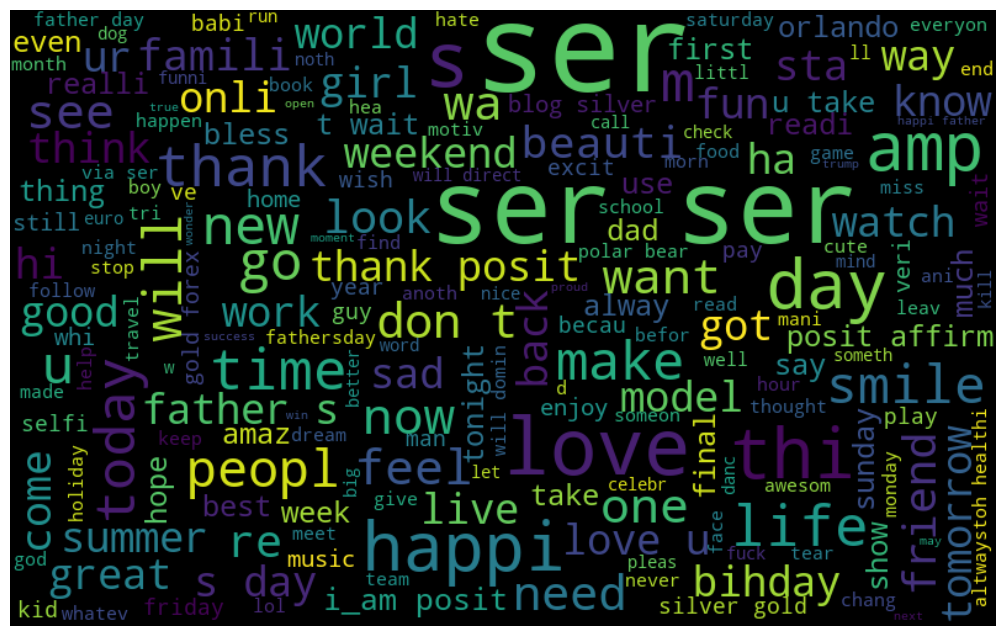

In [25]:
#frequent words visualization for positive words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
#extract the hastag
def hastag_extract(tweets):
    hastags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hastags.append(ht)
    return hastags

In [27]:
#extract hastag from non-racist/sexist tweets
ht_positive=hastag_extract(df['clean_tweet'][df['label']==0])

In [28]:
#extract hastag from racist/sexist tweets
ht_negative=hastag_extract(df['clean_tweet'][df['label']==1])

In [29]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [30]:
ht_postive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])


In [31]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [45]:
#frequency of the hastags
hashtags = [ht for sublist in ht_positive for ht in sublist]

# create a FreqDist object
freq = nltk.FreqDist(hashtags)

# create a DataFrame with the hashtag counts
positive_hashes = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

In [46]:
positive_hashes.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


<AxesSubplot: xlabel='Hashtag', ylabel='Count'>

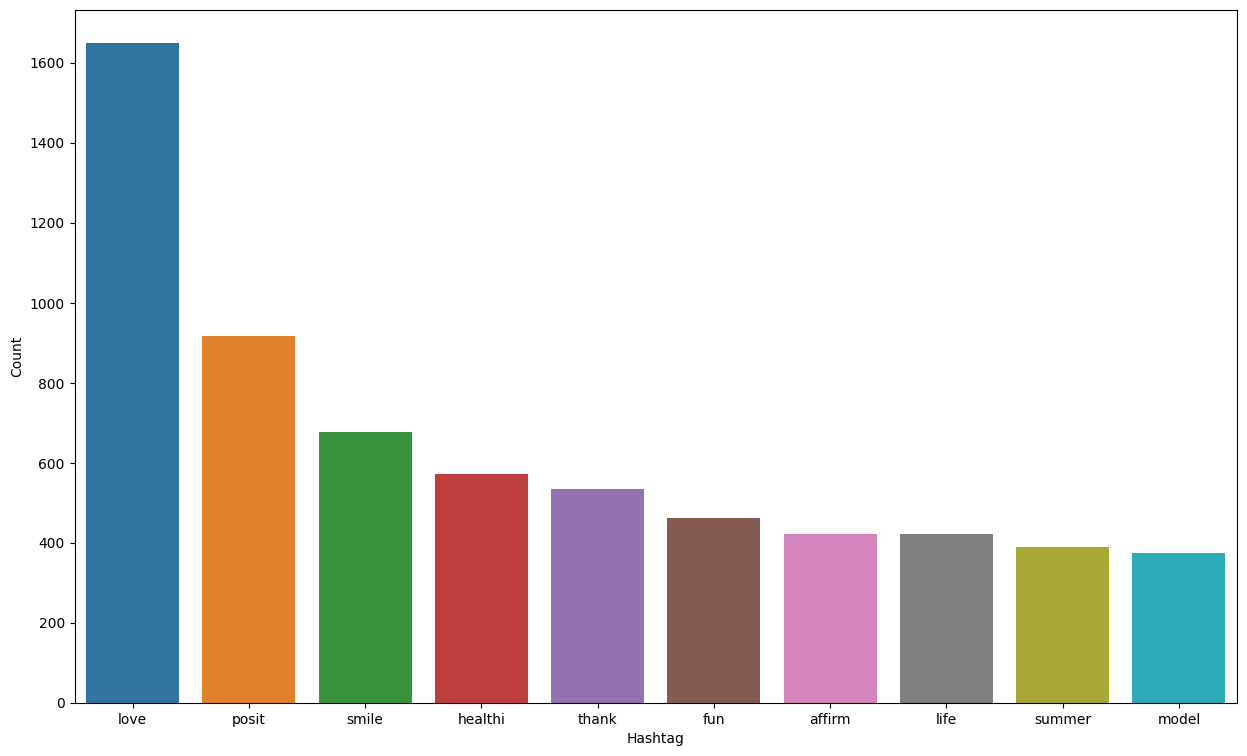

In [51]:
#select the top 10 hastags
hash=positive_hashes.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sbs.barplot(data=hash,x='Hashtag',y='Count')

Feature extraction

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(bow,df['label'],test_size=0.3,random_state=42)

Model training

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [56]:
model=LogisticRegression()

In [57]:
model.fit(X_train,Y_train)

LogisticRegression()

In [58]:
model.score(X_test,Y_test)

0.9460840546459485

Saving the trained model

In [59]:
import pickle

In [61]:
with open("Twitter_sentiment_analysis","wb") as f:
    pickle.dump(model,f)

In [62]:
with open("Twitter_sentiment_analysis","rb") as f:
    pickle.load(f)